In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("crime_data.csv")
data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
data[data.duplicated()].shape

(0, 5)

In [7]:
def norm_fun(i):
    X=(i-i.min())/(i.max()-i.min())
    return (X)

In [8]:
df_n=norm_fun(data.iloc[:,1:])
df_n.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


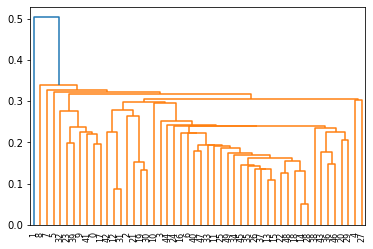

In [9]:
# Create Dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_n, method='single'))


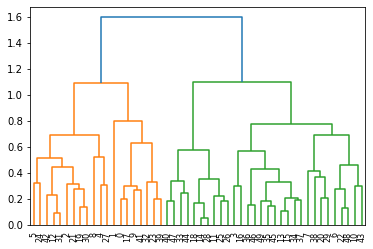

In [10]:
dendrogram=sch.dendrogram(sch.linkage(df_n, method='complete'))

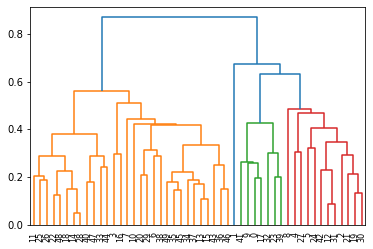

In [11]:
dendrogram=sch.dendrogram(sch.linkage(df_n, method='average'))

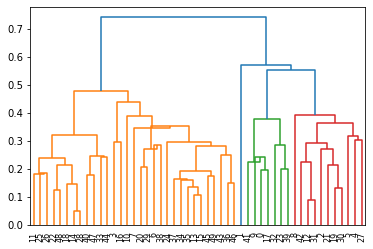

In [12]:
dendrogram=sch.dendrogram(sch.linkage(df_n, method='centroid'))

In [13]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hc

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [14]:
y_hc=hc.fit_predict(df_n)
clusters=pd.DataFrame(y_hc,columns=['cluster_id'])
clusters

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,cluster_id
0,0
1,2
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [15]:
data['h_cluster_id']=hc.labels_

In [16]:
hc.labels_

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [17]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [18]:
results=data.iloc[:,0:].groupby(data.h_cluster_id).mean()
results

,Murder,Assault,UrbanPop,Rape,h_cluster_id
h_cluster_id,,,,,
0,12.278947,254.842105,69.473684,28.357895,0.0
1,4.870000,114.433333,63.633333,15.943333,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
